Template: 



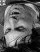

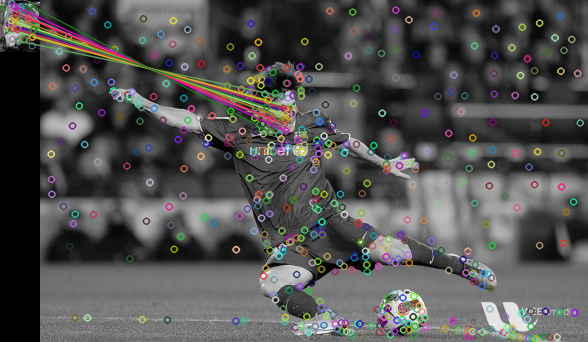

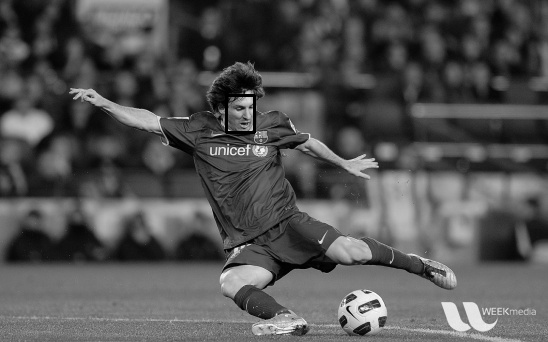

In [ ]:
import cv2
import numpy as np
def draw_rect_around_matches(image, key_points_image, good_matches):
    # Get coordinates of matched points in the image
    image_pts = np.float32([key_points_image[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Calculate the bounding rectangle around the matched points
    x, y, w, h = cv2.boundingRect(image_pts)

    # Draw the rectangle on the image
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image


def sift_matching(template_path, image_path):
    # Read images
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create SIFT object
    sift = cv2.SIFT_create()

    # Detect key points and compute descriptors
    key_points_template, descriptors_template = sift.detectAndCompute(template, None)
    key_points_image, descriptors_image = sift.detectAndCompute(image, None)

    # FLANN parameters for matching
    flann_index_params = dict(algorithm=0, trees=5)
    search_params = dict(checks=50)

    # FLANN matcher
    flann = cv2.FlannBasedMatcher(flann_index_params, search_params)

    # Match descriptors
    matches = flann.knnMatch(descriptors_template, descriptors_image, k=2)

    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Draw matches
    img_matches = cv2.drawMatches(template, key_points_template, image, key_points_image, good_matches, None)

    # Draw rectangle around all the good matches
    image_with_rect = draw_rect_around_matches(image.copy(), key_points_image, good_matches)

    template_img = cv2.imread('/content/drive/MyDrive/Template (2).jpg', cv2.IMREAD_GRAYSCALE)
    main_img = cv2.imread('/content/drive/MyDrive/messi5.jpg', cv2.IMREAD_GRAYSCALE)
    print("Template: \n")
    cv2_imshow(template_img)
    print("\n")
    # Display the results using cv2_imshow
    cv2_imshow(img_matches)
    print("\n")
    cv2_imshow(image_with_rect)


sift_matching('/content/drive/MyDrive/Template (2).jpg', '/content/drive/MyDrive/messi5.jpg')